In [1]:
import numpy as np
import pandas as pd
import librosa
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mounting google Drive to import data
path = '/content/drive/MyDrive/Assignment_2_data/dataset'
data_path=os.path.join(path, "X")
label_path=os.path.join(path, "Y")

In [4]:
x_train = np.load('/content/drive/MyDrive/Assignment_2_data/x_train.npy')
x_test = np.load('/content/drive/MyDrive/Assignment_2_data/x_test.npy')
y_train = np.load('/content/drive/MyDrive/Assignment_2_data/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Assignment_2_data/y_test.npy')

In [ ]:
input_shape= (64, 1000, 1)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(256, (3, 3), activation='relu'))
CNNmodel.add(layers.GlobalMaxPooling2D())
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(256, activation='relu'))
CNNmodel.add(layers.Dense(10, activation='sigmoid'))

NameError: ignored

In [ ]:
CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 998, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 499, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 499, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 497, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 248, 64)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 248, 64)       0

In [ ]:
CNNmodel.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [15]:
from keras.callbacks import ModelCheckpoint
filepath = '/content/drive/MyDrive/Assignment_2_data/CNN_best.epoch-loss.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=CNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100, verbose = 1, callbacks=[checkpoint])

Epoch 1/126
313/313 [==============================] - ETA: 0s - loss: 0.3804 - accuracy: 0.1117
Epoch 1: val_accuracy improved from -inf to 0.04800, saving model to /content/drive/MyDrive/Assignment_2_data/CNN_best.epoch-loss.hdf5
313/313 [==============================] - 36s 85ms/step - loss: 0.3804 - accuracy: 0.1117 - val_loss: 0.4481 - val_accuracy: 0.0480
Epoch 2/126
312/313 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.1127
Epoch 2: val_accuracy did not improve from 0.04800
313/313 [==============================] - 24s 78ms/step - loss: 0.3527 - accuracy: 0.1125 - val_loss: 0.4355 - val_accuracy: 0.0480
Epoch 3/126
312/313 [============================>.] - ETA: 0s - loss: 0.3336 - accuracy: 0.1125
Epoch 3: val_accuracy did not improve from 0.04800
313/313 [==============================] - 25s 79ms/step - loss: 0.3336 - accuracy: 0.1126 - val_loss: 0.3806 - val_accuracy: 0.0480
Epoch 4/126
312/313 [============================>.] - ETA: 0s - loss: 0.

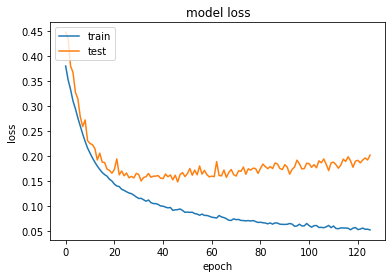

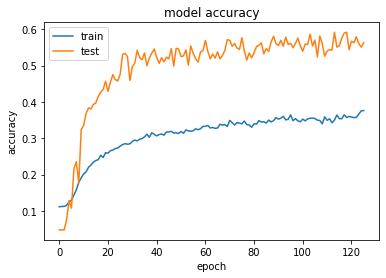

In [ ]:
from matplotlib import pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
import keras
CNNmodel=keras.models.load_model('/content/drive/MyDrive/Assignment_2_data/CNN_best.epoch-loss.hdf5')
accuracy = CNNmodel.evaluate(x_test, y_test)
pred=CNNmodel.predict(x_test)



63/63 [==============================] - 2s 26ms/step


In [31]:
def modify_predictions(y_pred, th):
  for arr in y_pred:
    i = 0
    for z in arr:
      if(z>=th):
        arr[i] = 1
      else:
        arr[i] = 0
      i = i+1
  return y_pred

In [32]:
pred

array([[1.0000000e+00, 2.4683438e-11, 2.5989823e-07, ..., 1.1844542e-07,
        9.9975544e-01, 8.8349796e-22],
       [9.9999619e-01, 2.7216669e-07, 9.8728697e-06, ..., 4.7025324e-07,
        9.9997985e-01, 1.5012847e-10],
       [9.9999988e-01, 2.3397989e-08, 2.5548989e-05, ..., 2.4087076e-05,
        6.0625607e-01, 2.2474911e-11],
       ...,
       [9.9999988e-01, 2.5711233e-09, 5.7418207e-03, ..., 8.7552920e-08,
        1.4433059e-01, 2.9144181e-14],
       [9.9996781e-01, 3.1033733e-06, 1.1659047e-04, ..., 2.3330890e-06,
        9.9999917e-01, 3.8186462e-07],
       [1.0000000e+00, 2.8956253e-09, 1.4596168e-07, ..., 1.9254096e-06,
        1.0000000e+00, 3.4890632e-16]], dtype=float32)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, modify_predictions(pred, 0.3)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       392
           1       0.88      0.89      0.89       436
           2       0.98      0.84      0.90       274
           3       0.76      0.72      0.74       444
           4       0.96      0.81      0.88       306
           5       0.92      0.78      0.85       221
           6       0.88      0.73      0.80       130
           7       0.84      0.77      0.80       143
           8       0.78      0.97      0.87      1246
           9       0.77      0.77      0.77       151

   micro avg       0.84      0.87      0.85      3743
   macro avg       0.87      0.82      0.84      3743
weighted avg       0.85      0.87      0.85      3743
 samples avg       0.85      0.89      0.84      3743



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, pred)

array([[[1576,   32],
        [  29,  363]],

       [[1512,   52],
        [  47,  389]],

       [[1721,    5],
        [  44,  230]],

       [[1456,  100],
        [ 124,  320]],

       [[1683,   11],
        [  57,  249]],

       [[1764,   15],
        [  48,  173]],

       [[1857,   13],
        [  35,   95]],

       [[1836,   21],
        [  33,  110]],

       [[ 409,  345],
        [  33, 1213]],

       [[1814,   35],
        [  35,  116]]])